In [1]:
import numpy as np
import scipy.ndimage as ndi
from skimage import io, color, util
import matplotlib.pyplot as plt

In [3]:
image_path = r"kitty.jpg"
image = io.imread(image_path)
gray_image = color.rgb2gray(image) # Convert to grayscale
def mean_filter(image, size=3):
    return ndi.uniform_filter(image, size=size)
def median_filter(image, size=5):
    return ndi.median_filter(image, size=size)
def gaussian_filter(image, sigma=1.0):
    return ndi.gaussian_filter(image, sigma=sigma)
def sobel_filter(image):
    sobel_x = ndi.sobel(image, axis=0)
    sobel_y = ndi.sobel(image, axis=1)
    magnitude = np.hypot(sobel_x, sobel_y)
    magnitude = (magnitude - np.min(magnitude)) / (np.max(magnitude) - np.min(magnitude))
    return magnitude

In [4]:
mean_result = mean_filter(gray_image)
median_result = median_filter(gray_image)
gaussian_result = gaussian_filter(gray_image)
sobel_result = sobel_filter(gray_image)
def convert_to_ubyte(image):
    return util.img_as_ubyte(image)
mean_result_ubyte = convert_to_ubyte(mean_result)
median_result_ubyte = convert_to_ubyte(median_result)
gaussian_result_ubyte = convert_to_ubyte(gaussian_result)
sobel_result_ubyte = convert_to_ubyte(sobel_result)
io.imsave('mean_filtered_image.png', mean_result_ubyte)
io.imsave('median_filtered_image.png', median_result_ubyte)
io.imsave('gaussian_filtered_image.png', gaussian_result_ubyte)
io.imsave('sobel_filtered_image.png', sobel_result_ubyte)

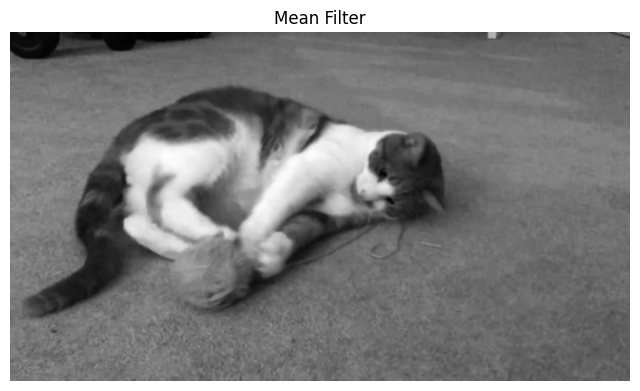

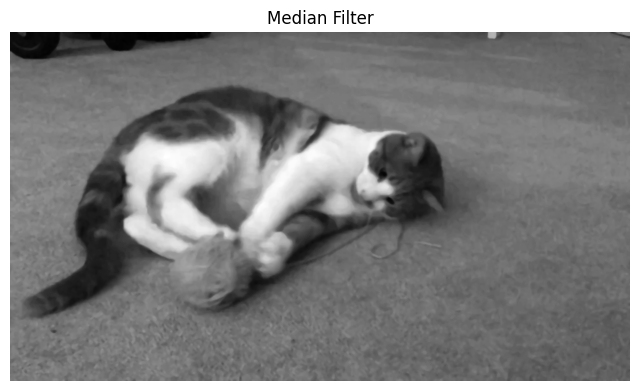

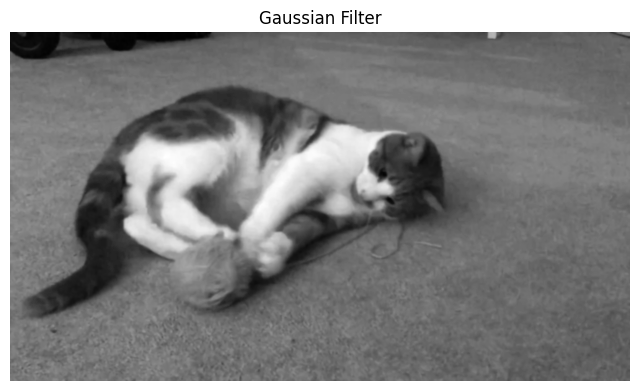

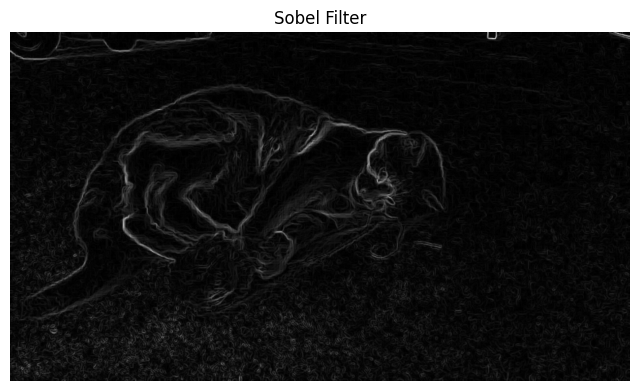

In [5]:
def display_image(image, title):
    plt.figure(figsize=(8, 8))
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()
display_image(mean_result, 'Mean Filter')
display_image(median_result, 'Median Filter')
display_image(gaussian_result, 'Gaussian Filter')
display_image(sobel_result, 'Sobel Filter')